Reading file: ../data/loadprofiles/heat_pump/single-family-detached/alameda/sam_optimized_load_profiles_alameda.csv


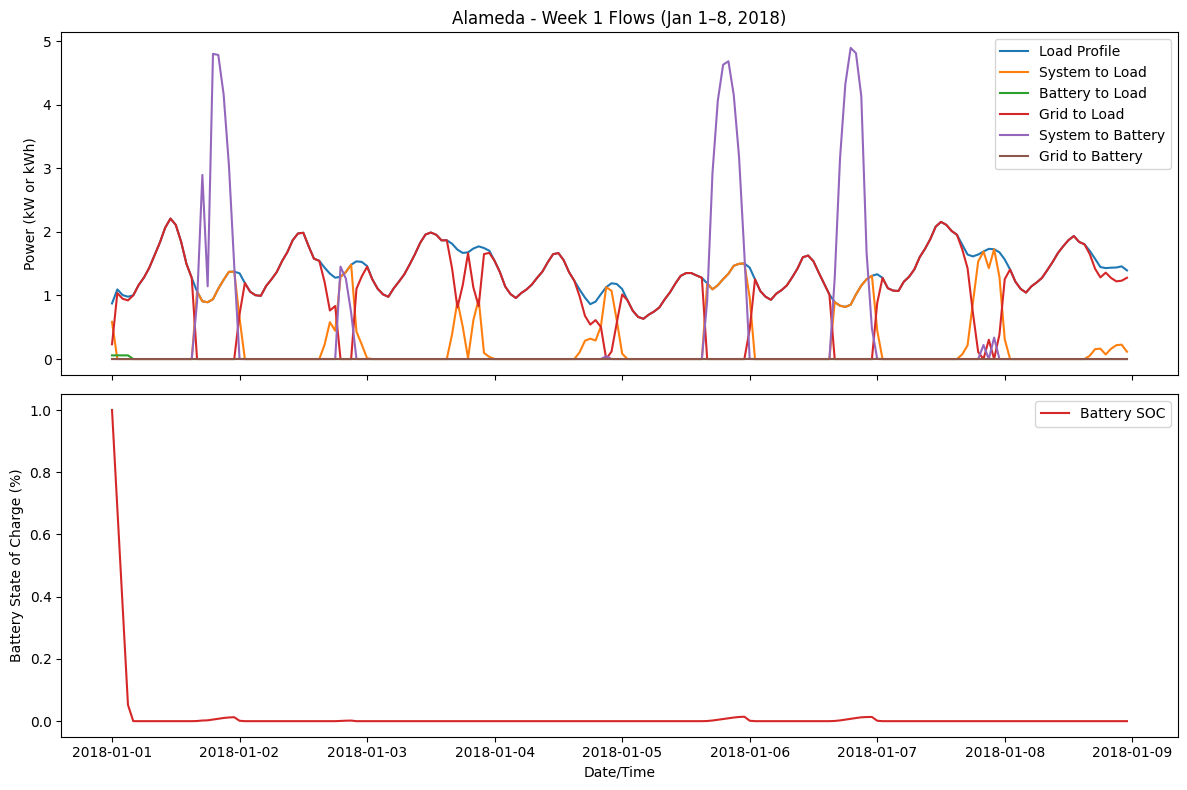

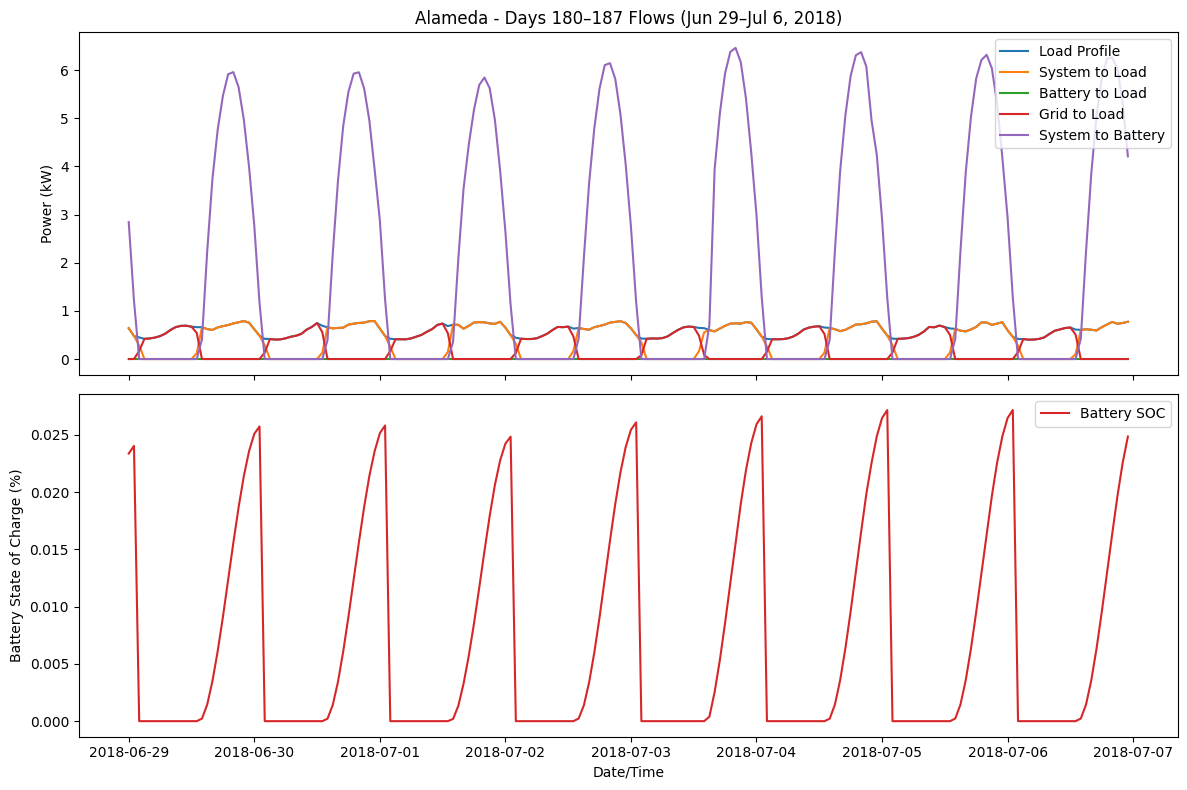

No file found for county 'contra_costa' at ../data/loadprofiles/heat_pump/single-family-detached/contra_costa/sam_optimized_load_profiles_contra_costa.csv
Reading file: ../data/loadprofiles/heat_pump/single-family-detached/marin/sam_optimized_load_profiles_marin.csv


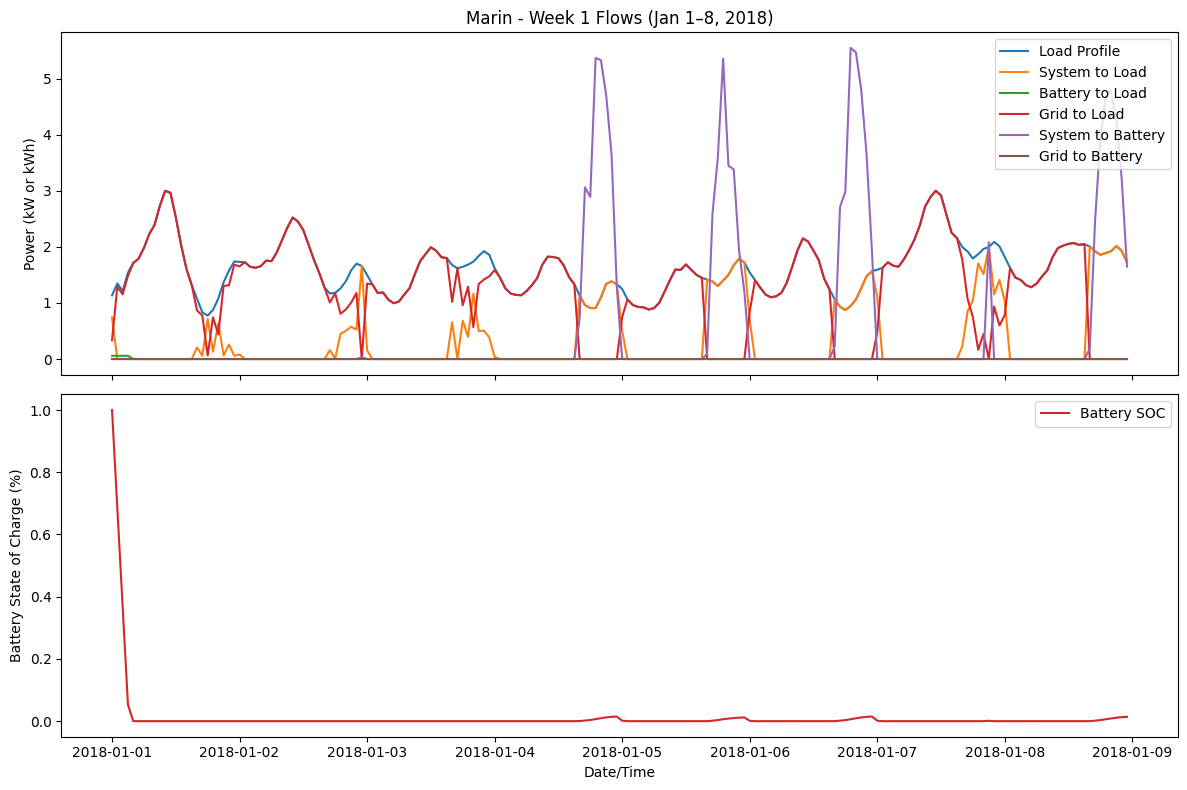

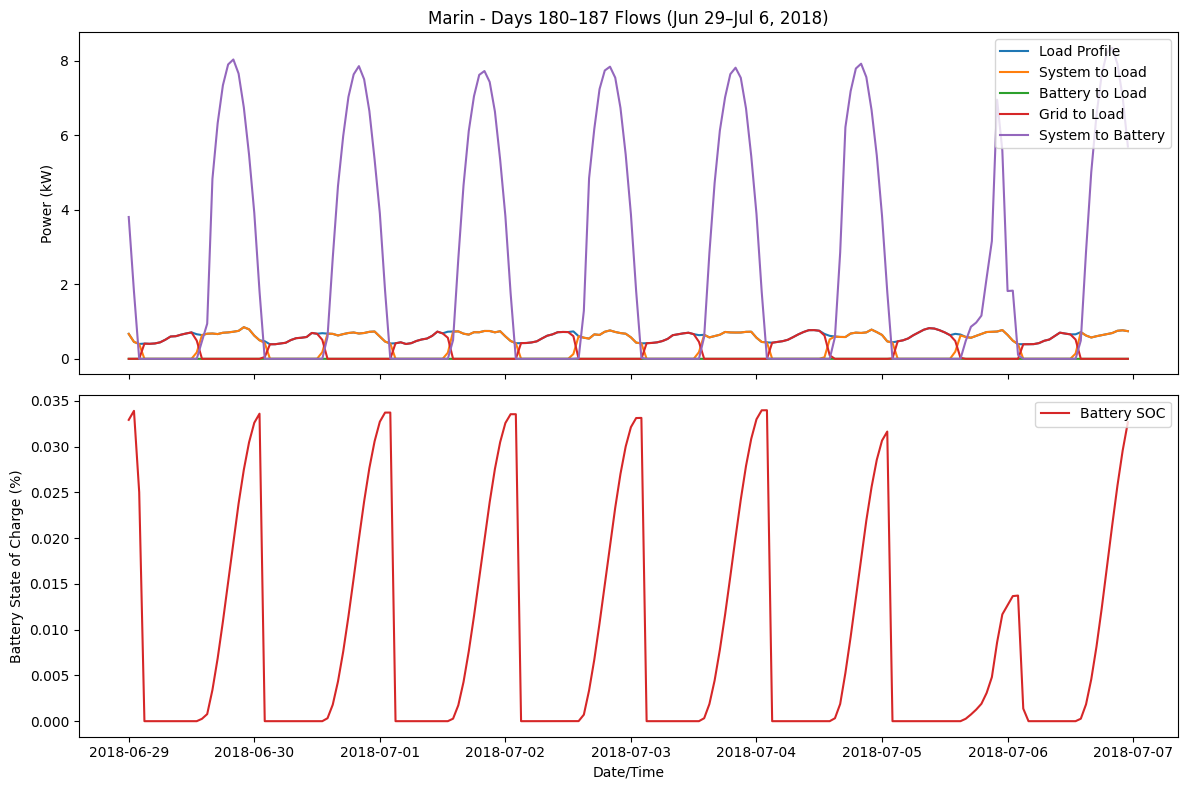

Reading file: ../data/loadprofiles/heat_pump/single-family-detached/napa/sam_optimized_load_profiles_napa.csv


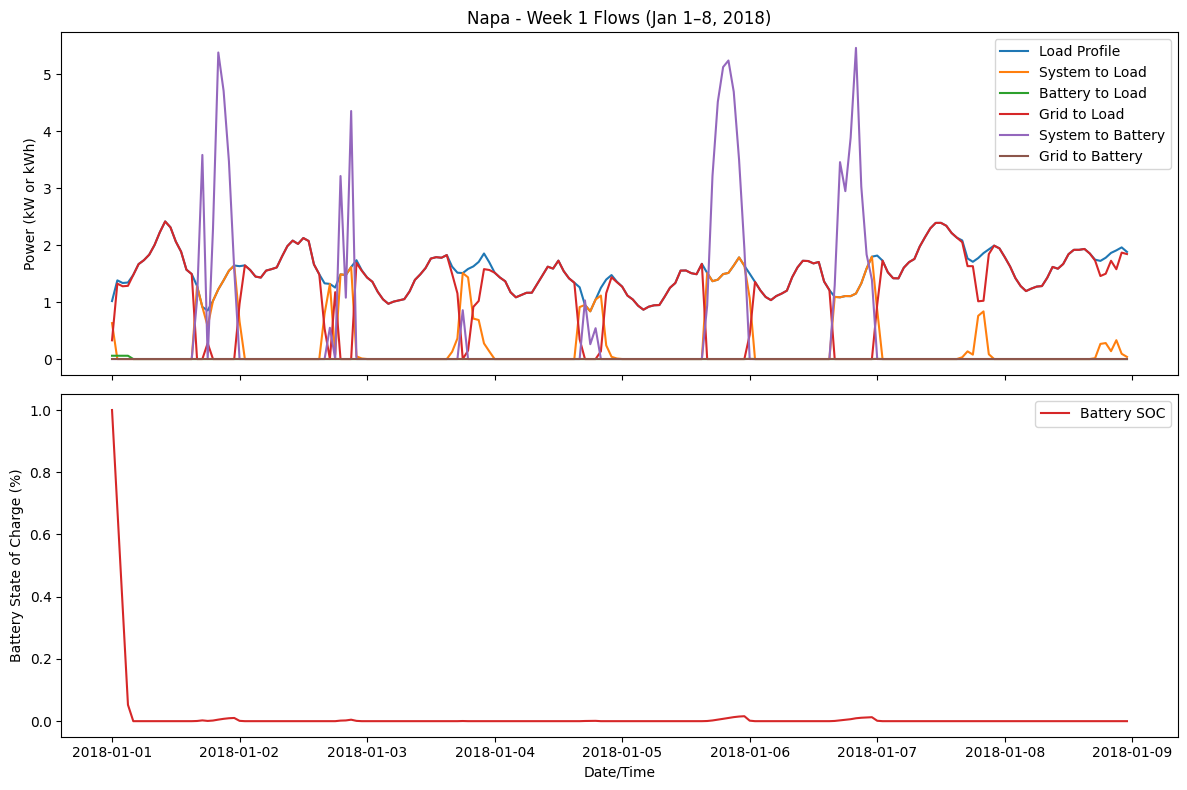

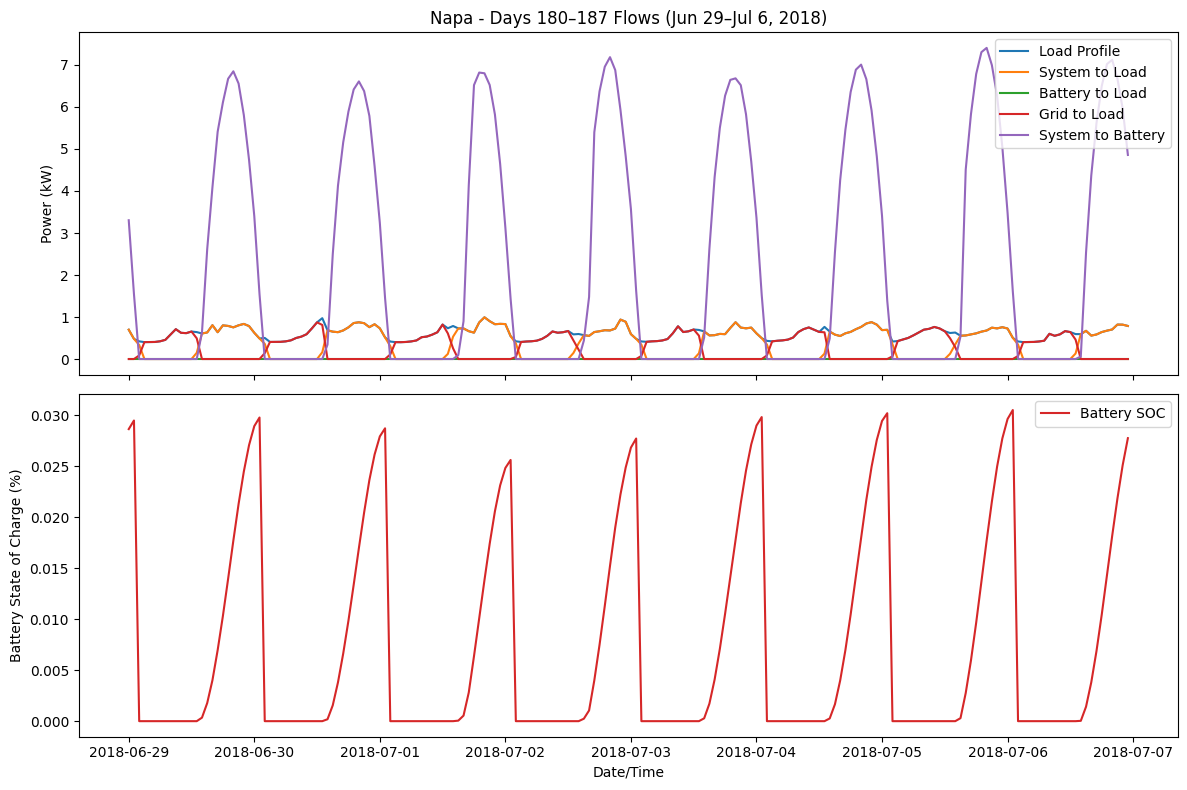

Reading file: ../data/loadprofiles/heat_pump/single-family-detached/sacramento/sam_optimized_load_profiles_sacramento.csv


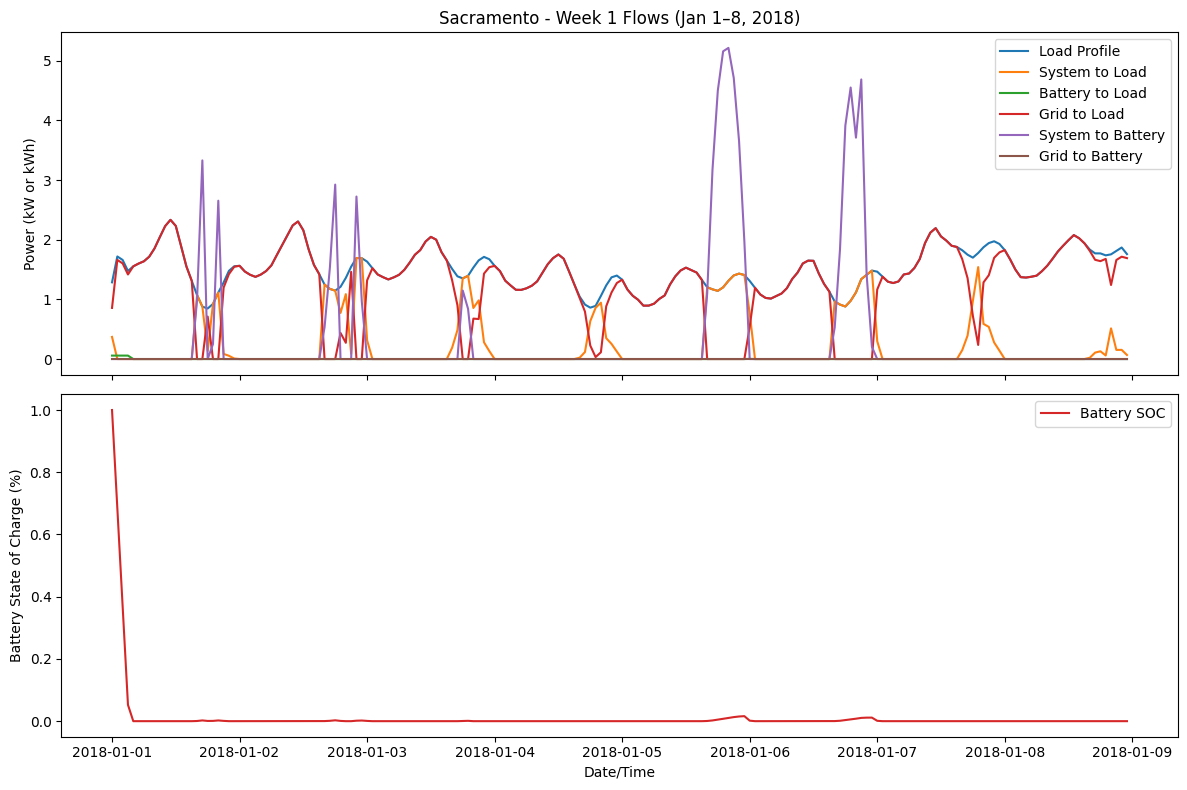

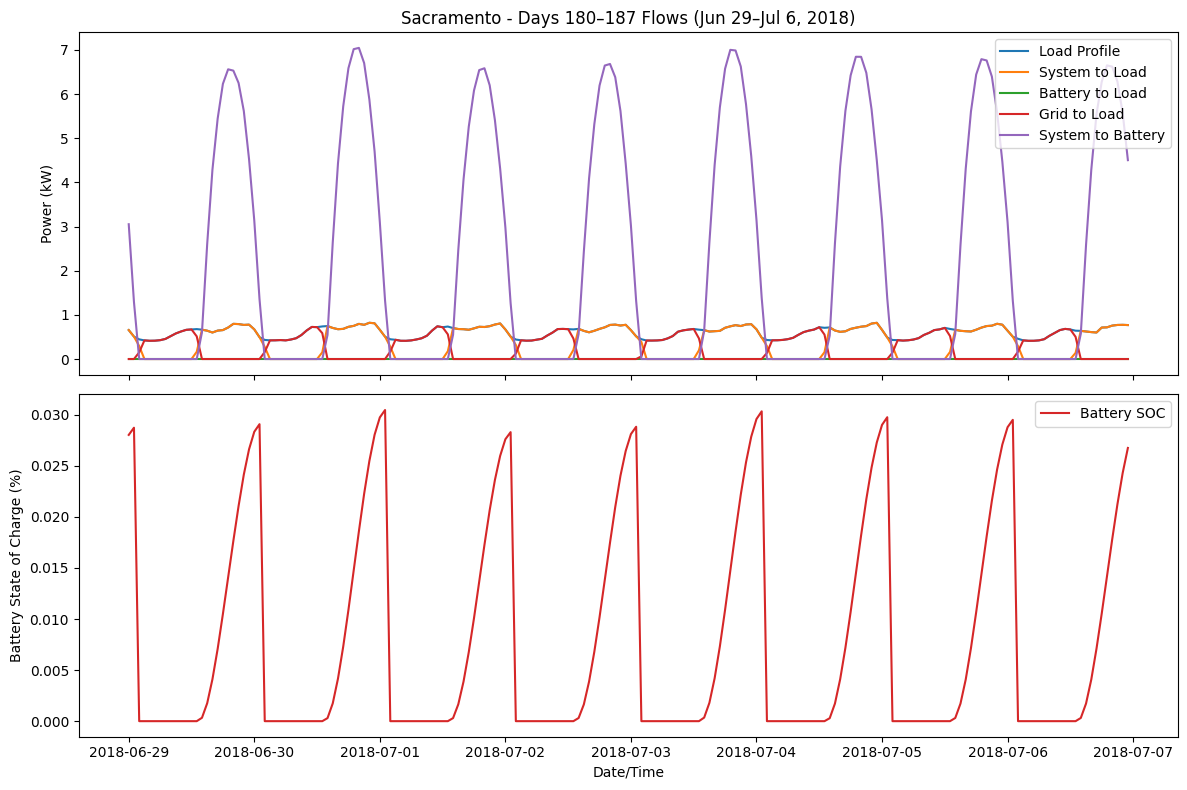

Reading file: ../data/loadprofiles/heat_pump/single-family-detached/fresno/sam_optimized_load_profiles_fresno.csv


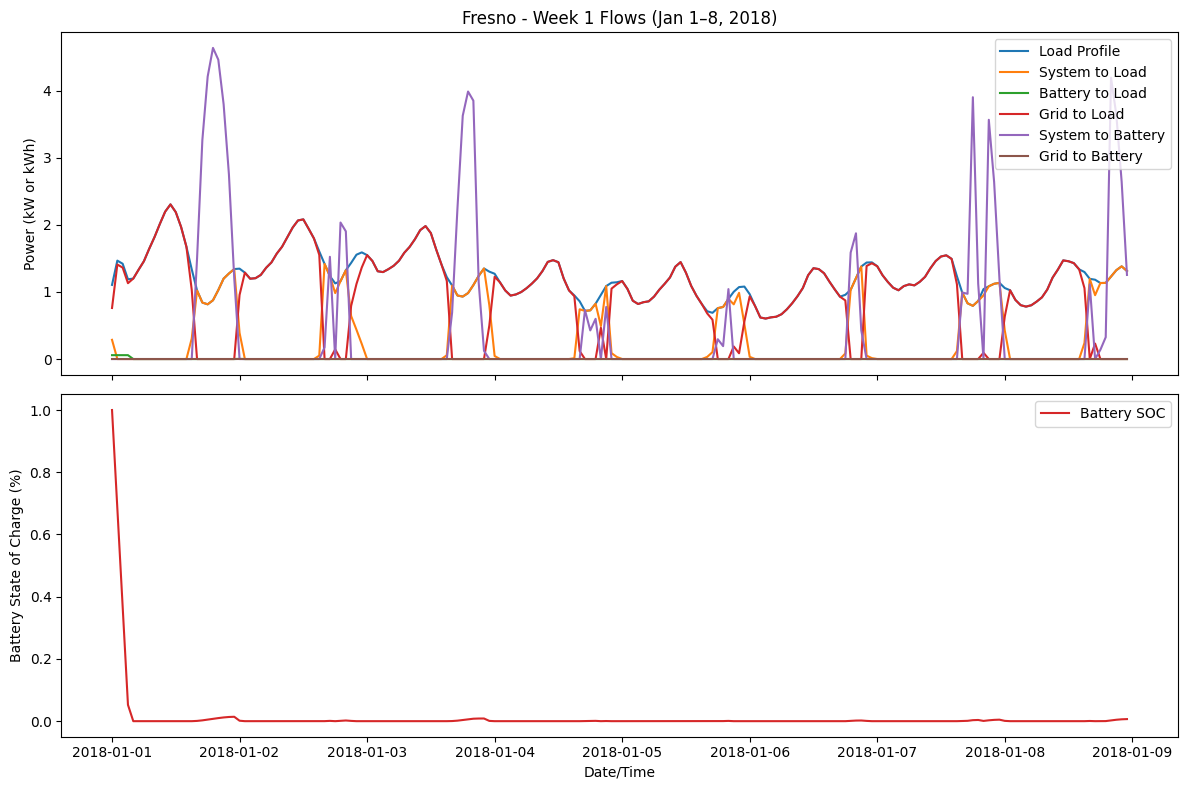

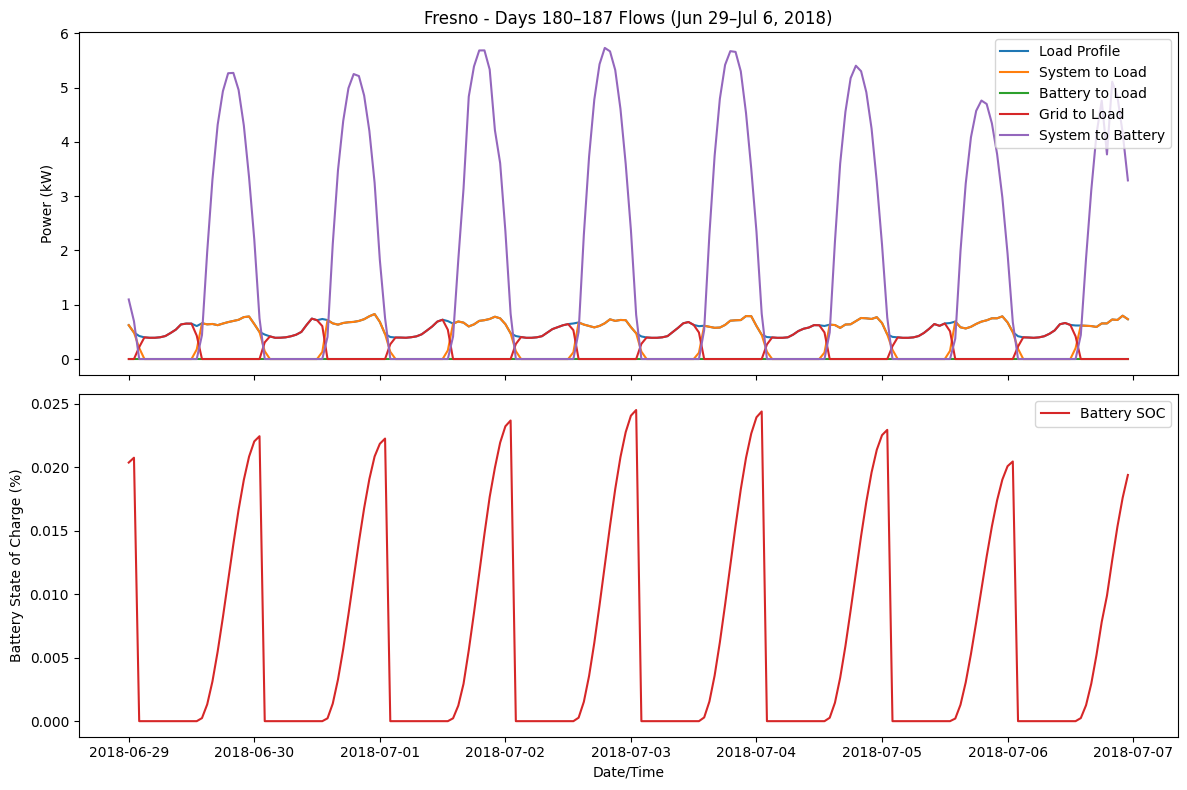

Reading file: ../data/loadprofiles/heat_pump/single-family-detached/merced/sam_optimized_load_profiles_merced.csv


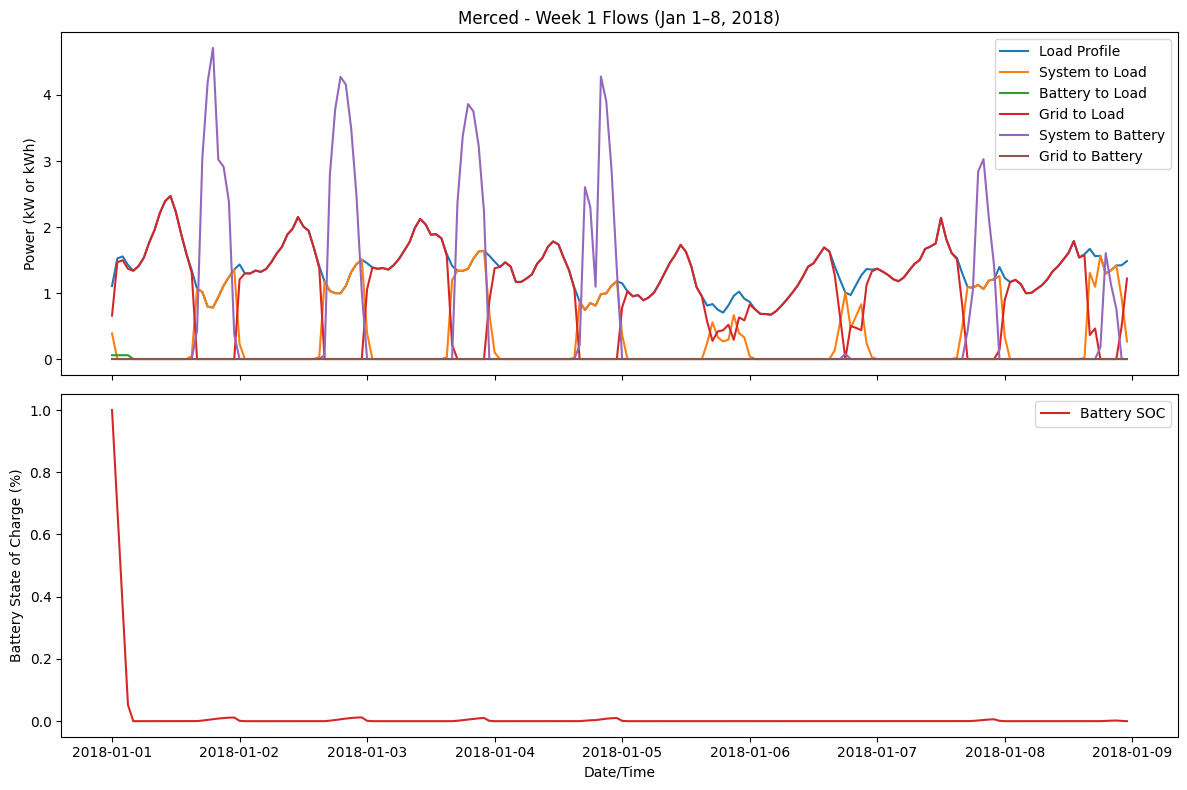

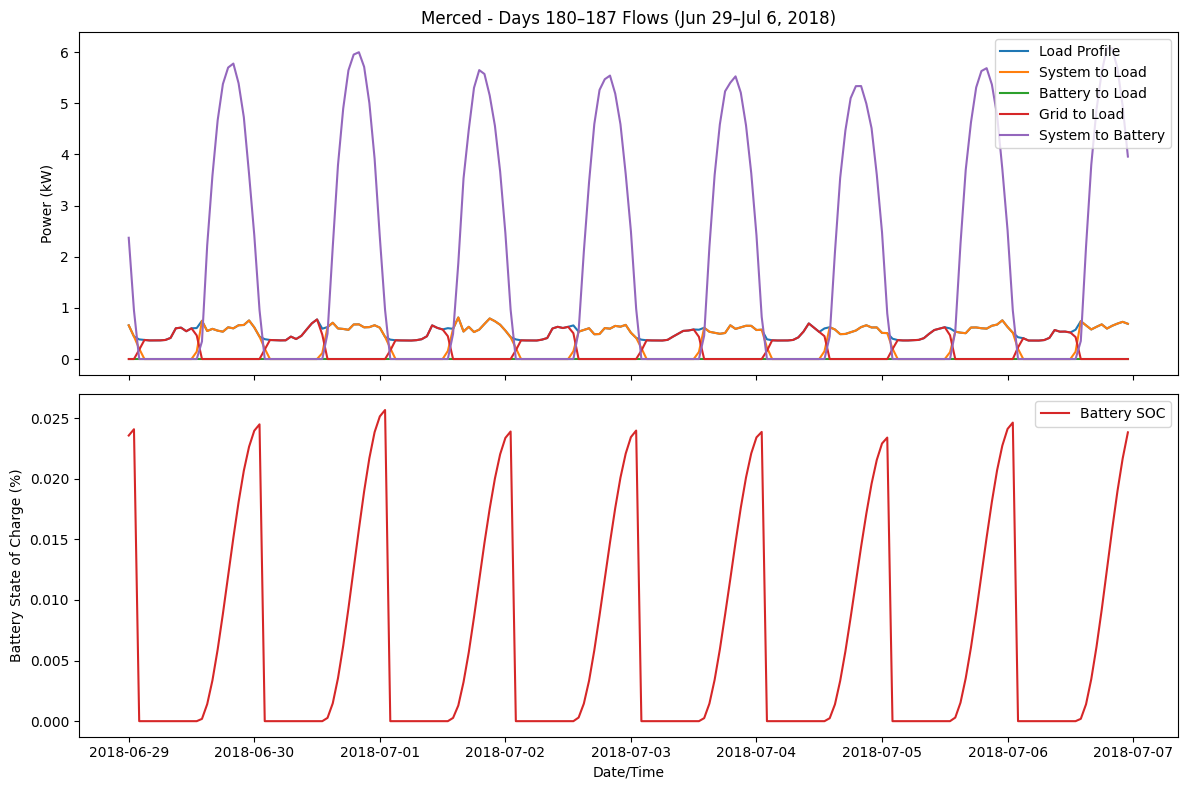

In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

norcal_counties = ["alameda", "contra_costa", "marin", "napa", "sacramento"]  # 
central_counties = ["fresno", "merced"]  #
# socal_counties = ["los_angeles", "orange", "san_diego"]  #

all_counties = norcal_counties + central_counties

base_dir = "../data/loadprofiles/heat_pump/single-family-detached"

# Day 1 is "2018-01-01"; day 8 ends at "2018-01-08 23:00:00"
# Day 180 is "2018-06-29"; day 187 ends at "2018-07-06 23:00:00"
week1_start, week1_end = "2018-01-01", "2018-01-08 23:00:00"
week180_start, week180_end = "2018-06-29", "2018-07-06 23:00:00"

for county in all_counties:
    file_pattern = os.path.join(base_dir, county, f"sam_optimized_load_profiles_{county}.csv")
    matching_files = glob.glob(file_pattern)
    
    if not matching_files:
        print(f"No file found for county '{county}' at {file_pattern}")
        continue
    
    file_path = matching_files[0]
    print(f"Reading file: {file_path}")

    df = pd.read_csv(
        file_path,
        parse_dates=[0],   # the first column has the timestamps
        index_col=0        # make the first column the DataFrame index
    )
    
    # Ensure columns have consistent names (they should match exactly the headers in your CSV)
    # e.g., "Load Profile", "System to Load", "Battery to Load", "Grid to Load",
    #       "Solar + Battery to Load", "Total Supply", "Difference",
    #       "System to Battery", "Battery SOC"
    
    # Subset the data for each time range
    df_week1 = df.loc[week1_start : week1_end]
    df_week180 = df.loc[week180_start : week180_end]

    # --- Week 1 ---
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
    
    # Plot flows on the first axis
    ax1.plot(df_week1.index, df_week1["Load Profile"], label="Load Profile")
    ax1.plot(df_week1.index, df_week1["System to Load"], label="System to Load")
    ax1.plot(df_week1.index, df_week1["Battery to Load"], label="Battery to Load")
    ax1.plot(df_week1.index, df_week1["Grid to Load"], label="Grid to Load")
    ax1.plot(df_week1.index, df_week1["System to Battery"], label="System to Battery")
    ax1.plot(df_week1.index, df_week1["Grid to Battery"], label="Grid to Battery")
    ax1.set_title(f"{county.title()} - Week 1 Flows (Jan 1–8, 2018)")
    ax1.set_ylabel("Power (kW or kWh)")  # Adjust units as appropriate
    ax1.legend(loc="upper right")

    # Plot Battery SOC on the second axis
    ax2.plot(df_week1.index, df_week1["Battery SOC"], color="tab:red", label="Battery SOC")
    ax2.set_ylabel("Battery State of Charge (%)")
    ax2.set_xlabel("Date/Time")
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

    # --- Week 2 ---
    fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
    
    # Plot flows on the first axis
    ax3.plot(df_week180.index, df_week180["Load Profile"], label="Load Profile")
    ax3.plot(df_week180.index, df_week180["System to Load"], label="System to Load")
    ax3.plot(df_week180.index, df_week180["Battery to Load"], label="Battery to Load")
    ax3.plot(df_week180.index, df_week180["Grid to Load"], label="Grid to Load")
    ax3.plot(df_week180.index, df_week180["System to Battery"], label="System to Battery")
    ax1.plot(df_week180.index, df_week180["Grid to Battery"], label="Grid to Battery")
    ax3.set_title(f"{county.title()} - Days 180–187 Flows (Jun 29–Jul 6, 2018)")
    ax3.set_ylabel("Power (kW)")
    ax3.legend(loc="upper right")

    # Plot Battery SOC on the second axis
    ax4.plot(df_week180.index, df_week180["Battery SOC"], color="tab:red", label="Battery SOC")
    ax4.set_ylabel("Battery State of Charge (%)")
    ax4.set_xlabel("Date/Time")
    ax4.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

     Alameda  •  last modified: 2025-04-30 14:56:30  |  created: 2025-04-30 14:56:30


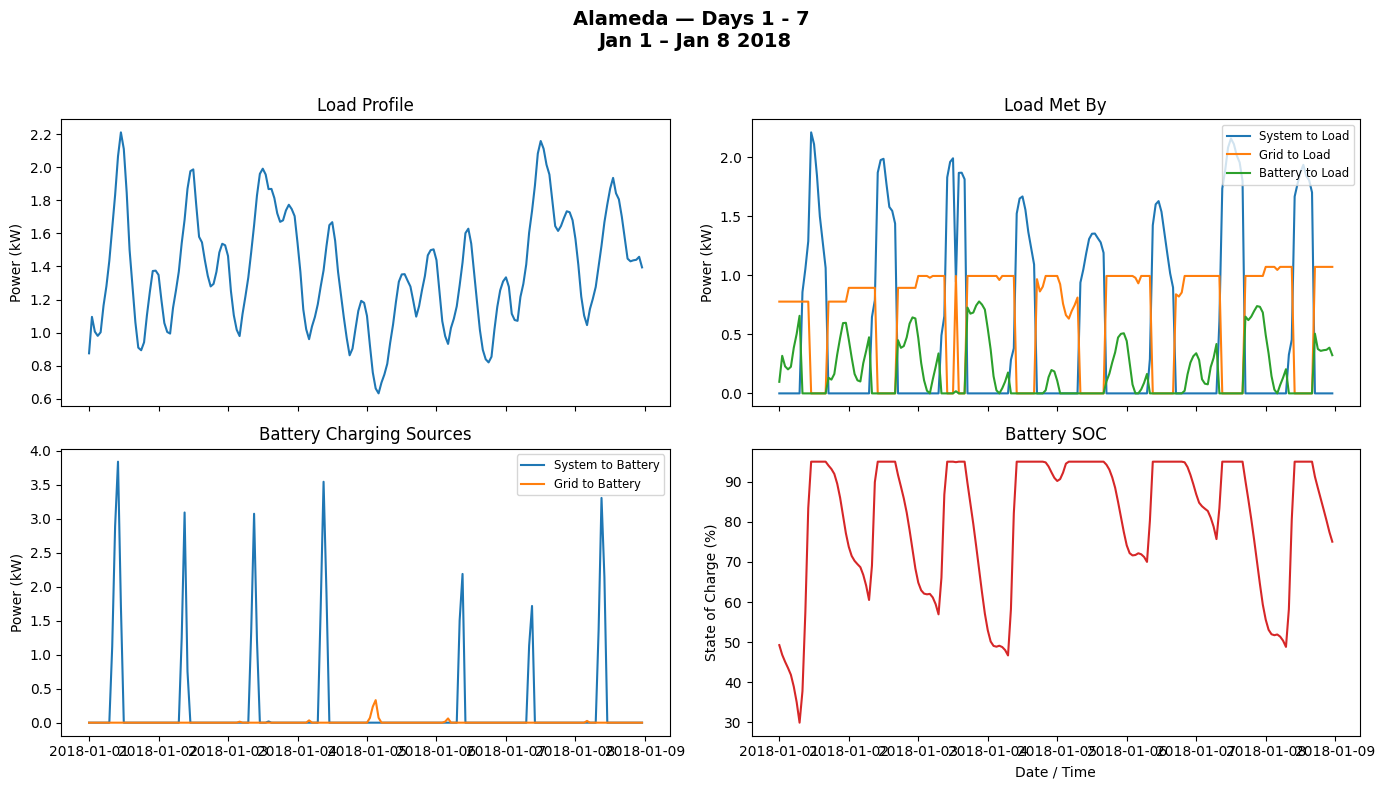

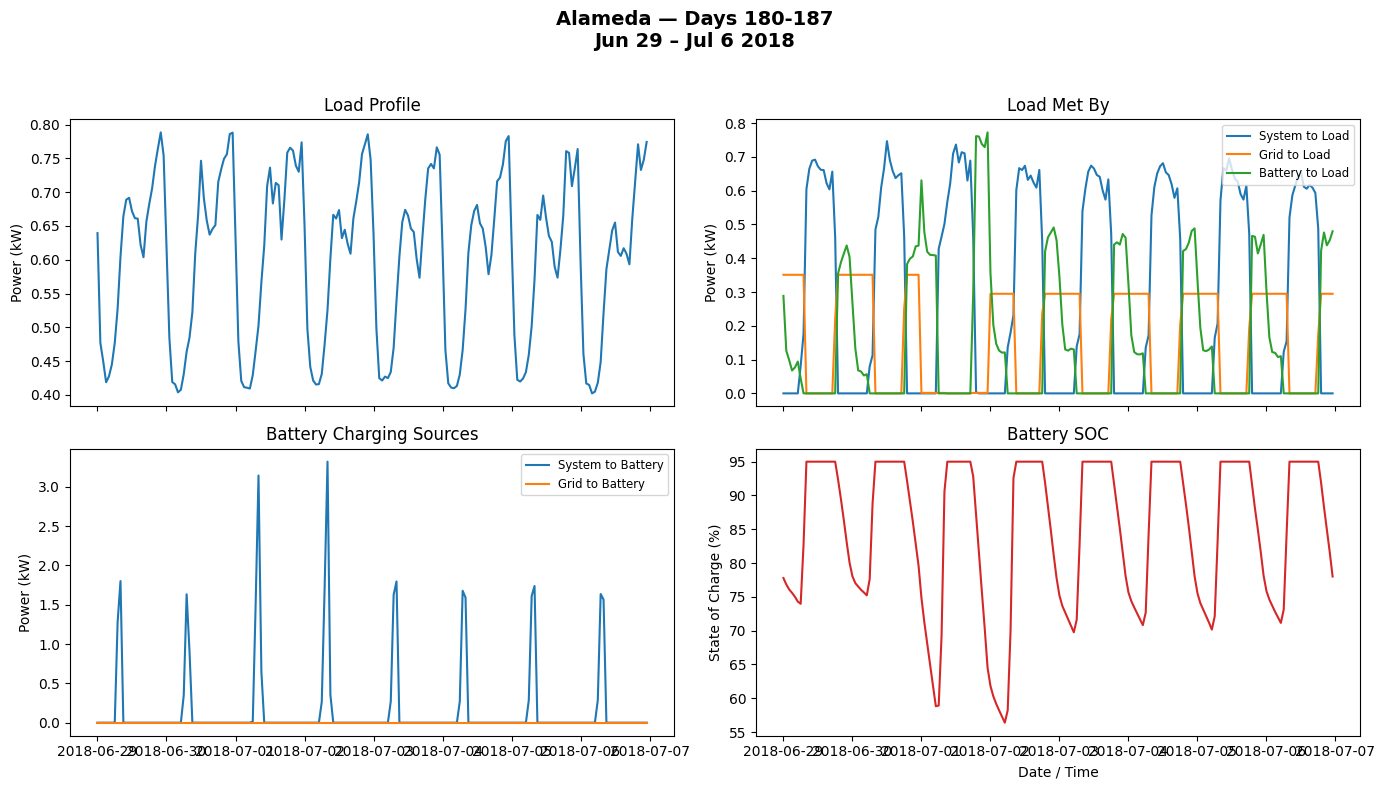

No load-profile CSV for “contra_costa” (looked in ../data/loadprofiles/heat_pump/single-family-detached/contra_costa/sam_optimized_load_profiles_contra_costa.csv)
       Marin  •  last modified: 2025-04-30 14:56:31  |  created: 2025-04-30 14:56:31


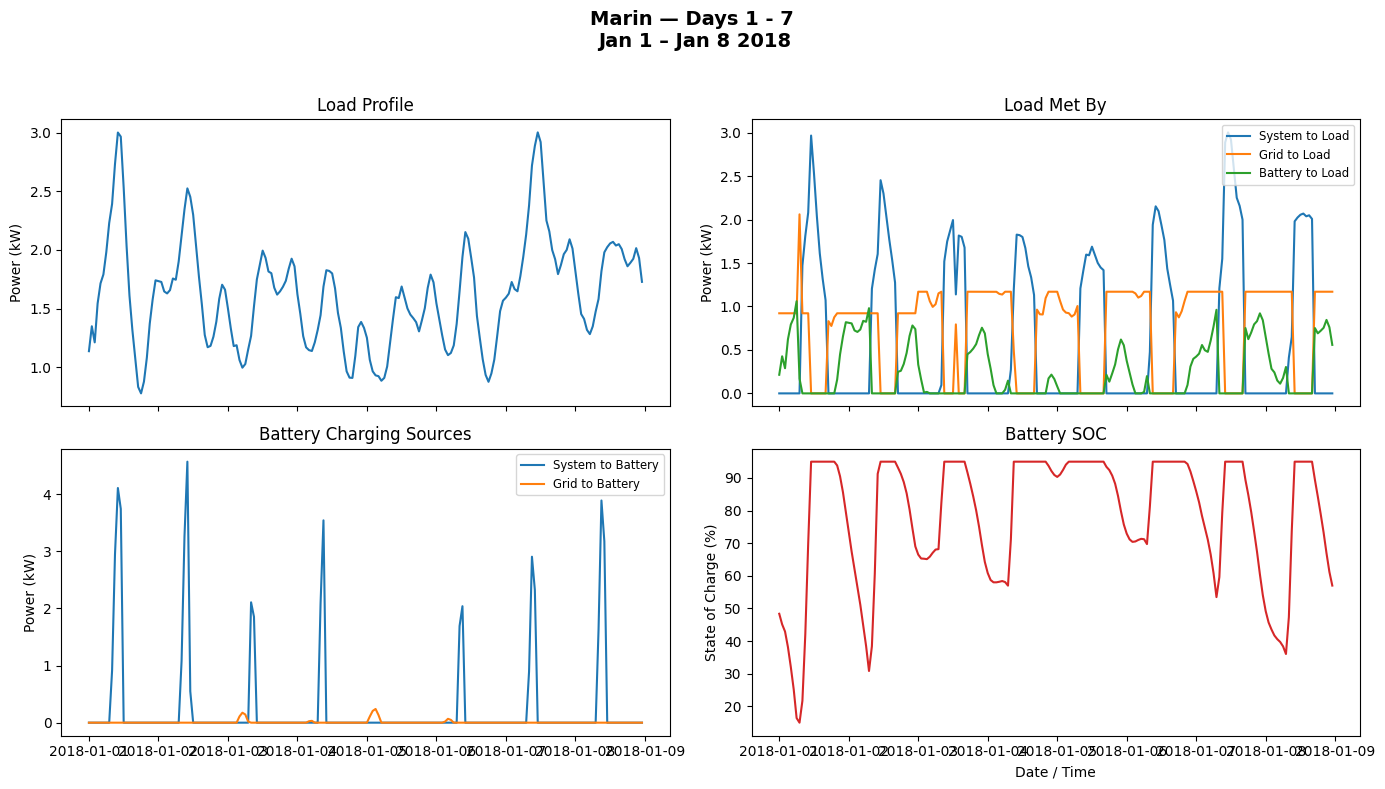

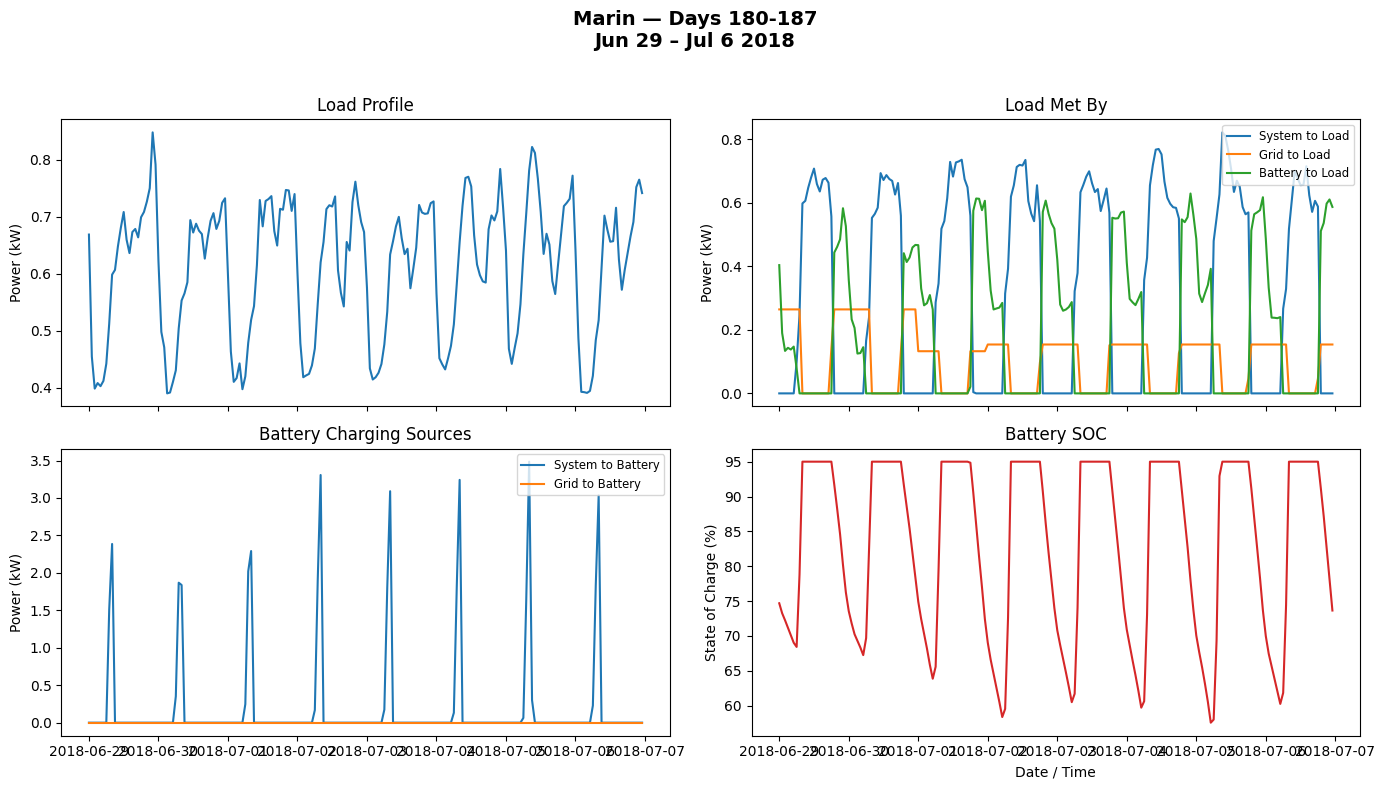

        Napa  •  last modified: 2025-04-30 14:56:31  |  created: 2025-04-30 14:56:31


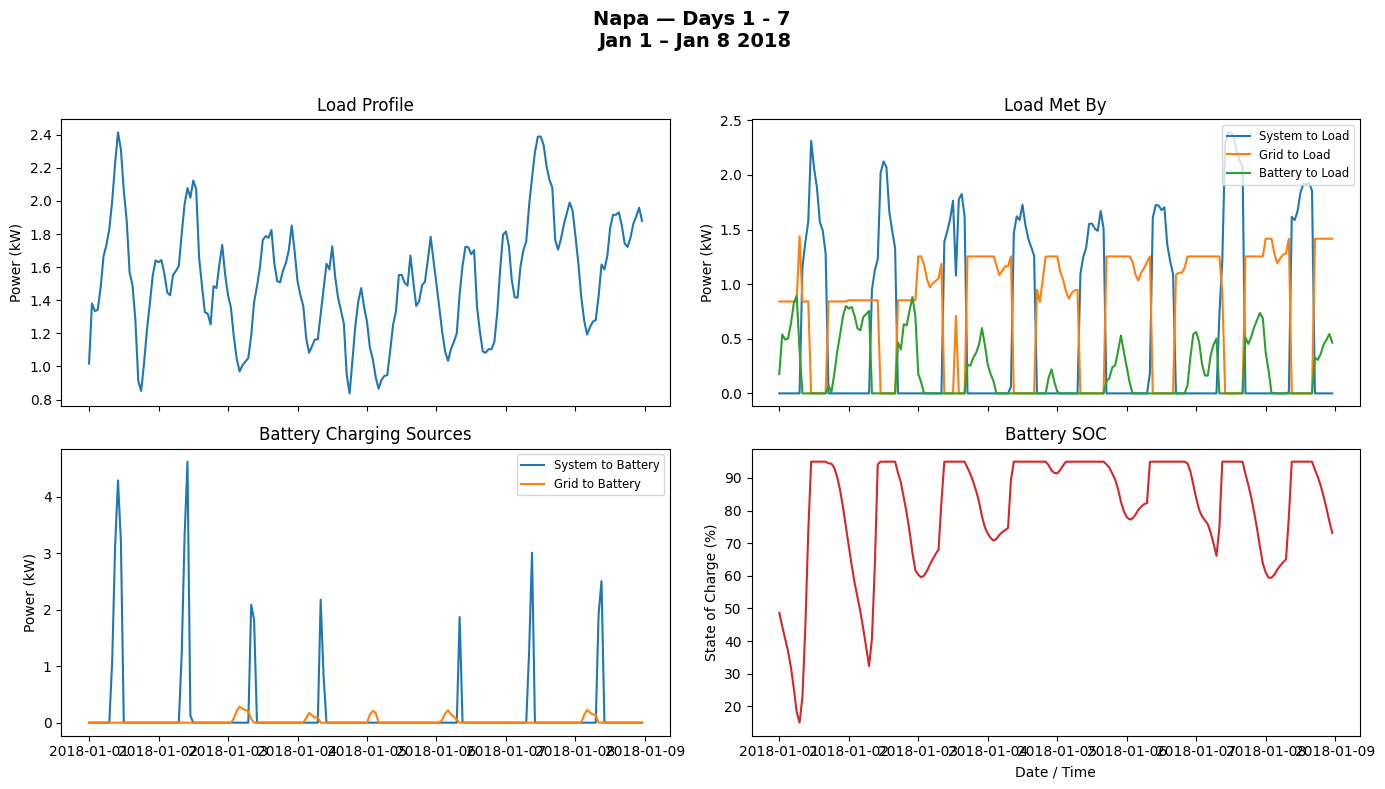

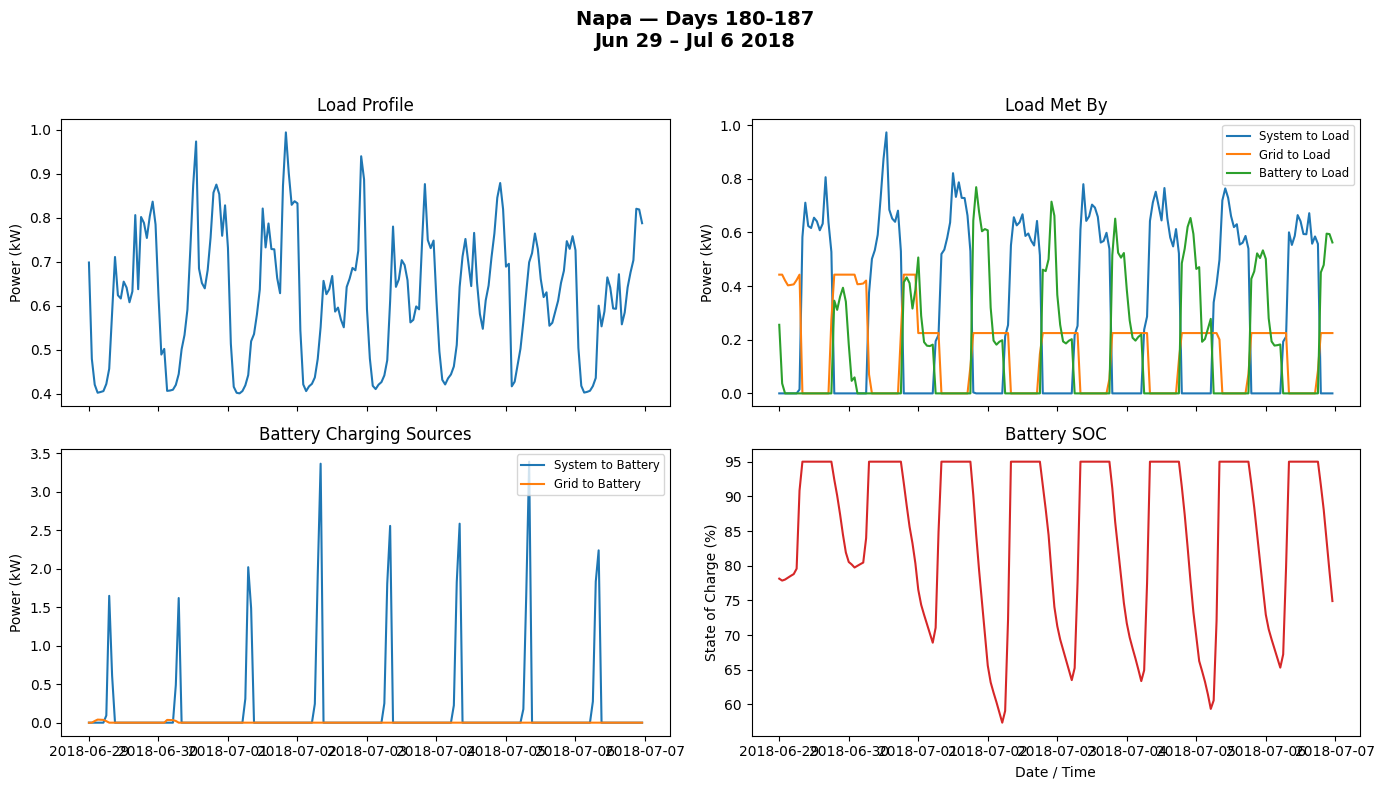

  Sacramento  •  last modified: 2025-04-30 14:56:34  |  created: 2025-04-30 14:56:34


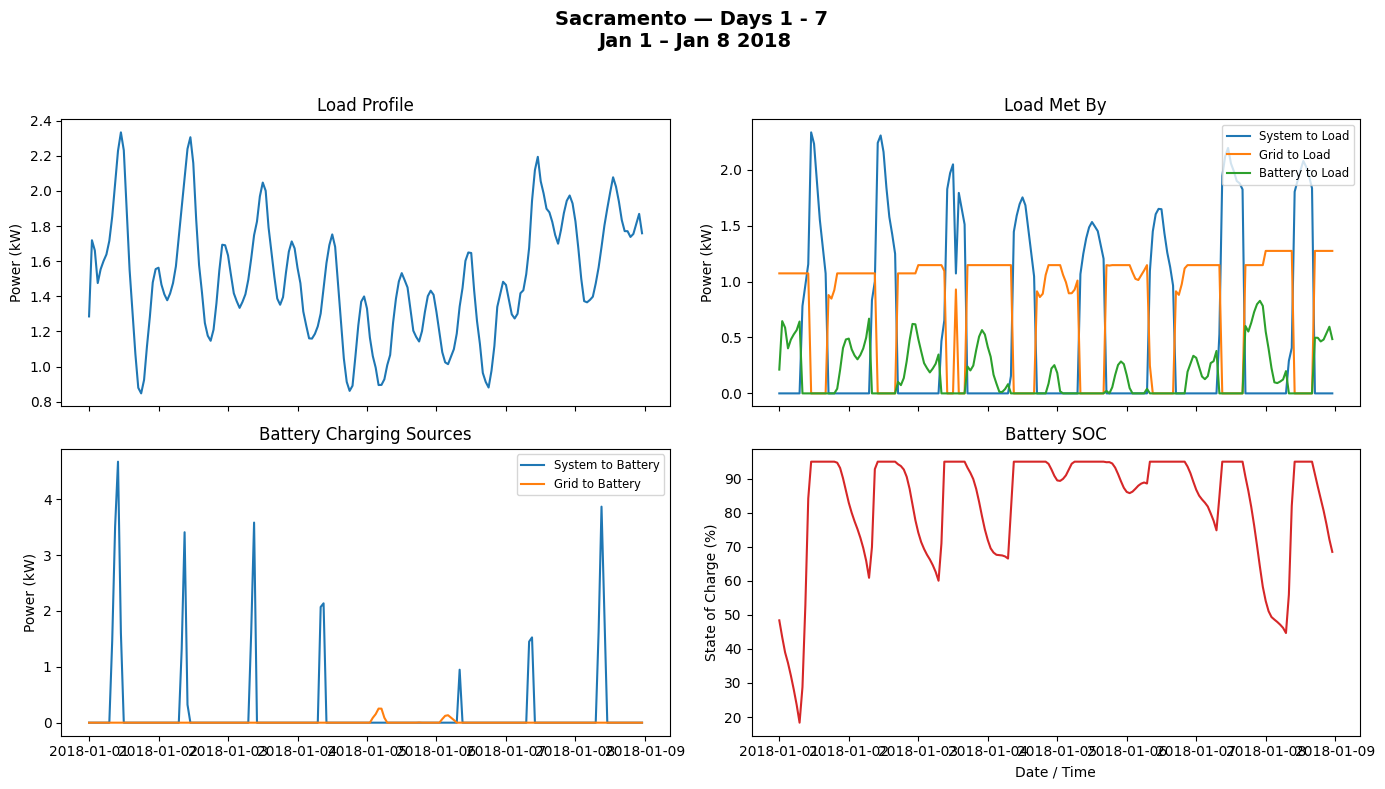

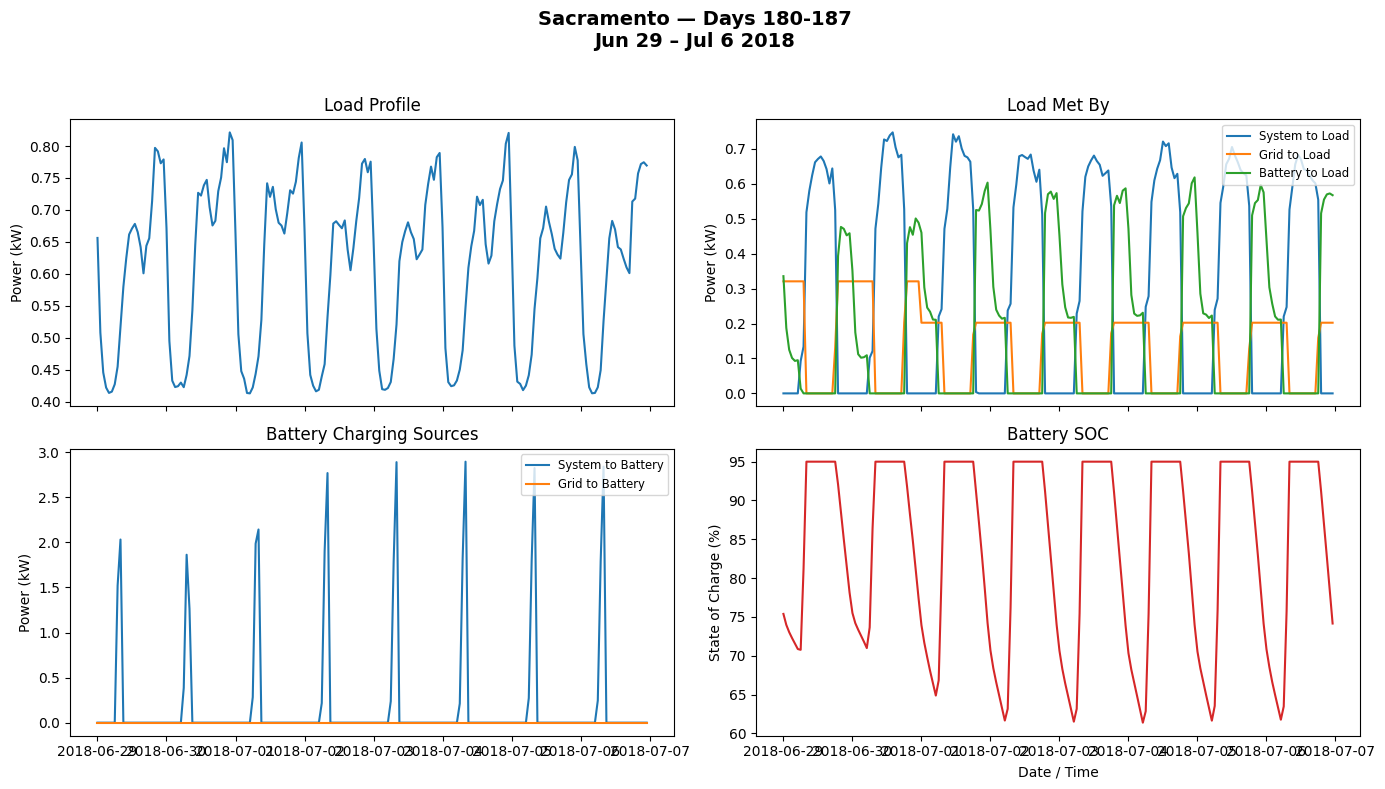

      Fresno  •  last modified: 2025-04-30 14:56:33  |  created: 2025-04-30 14:56:33


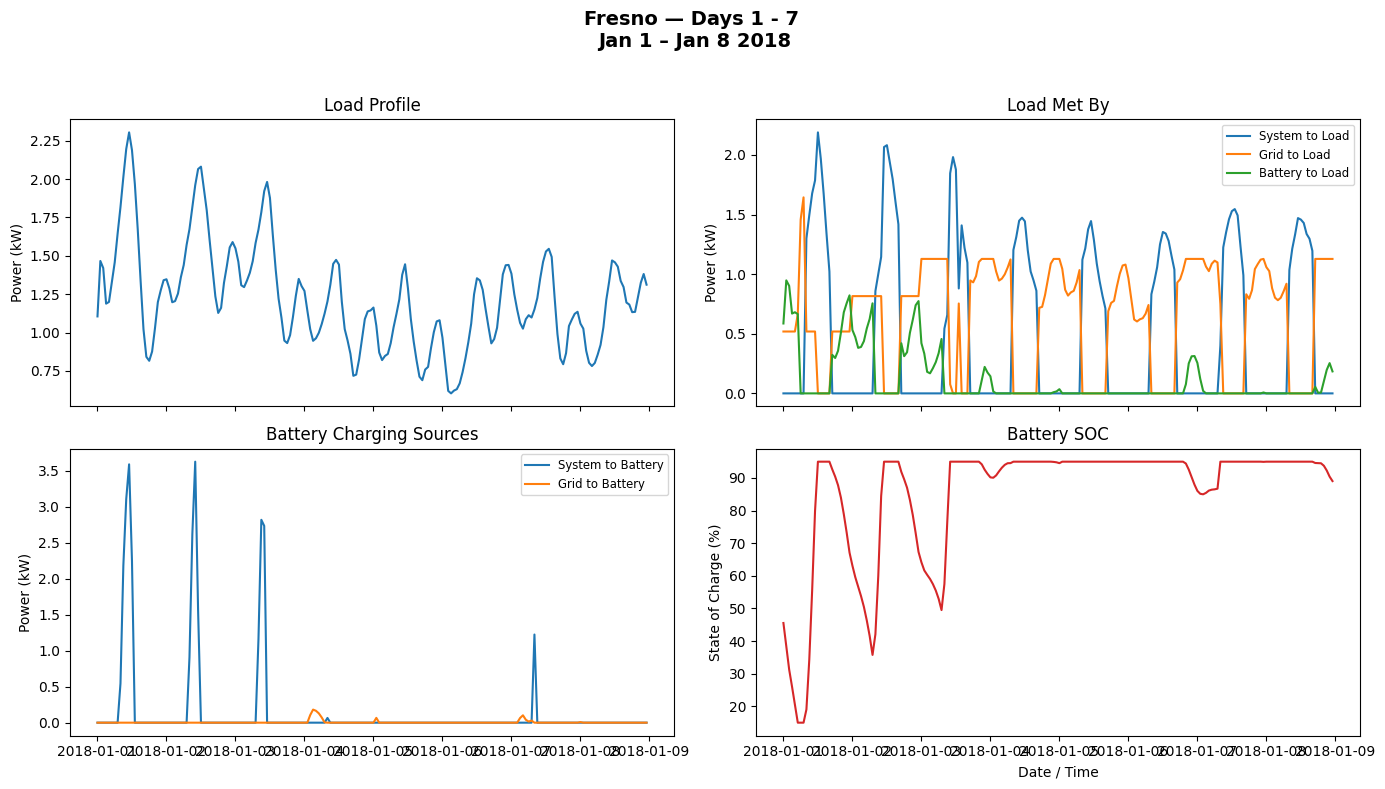

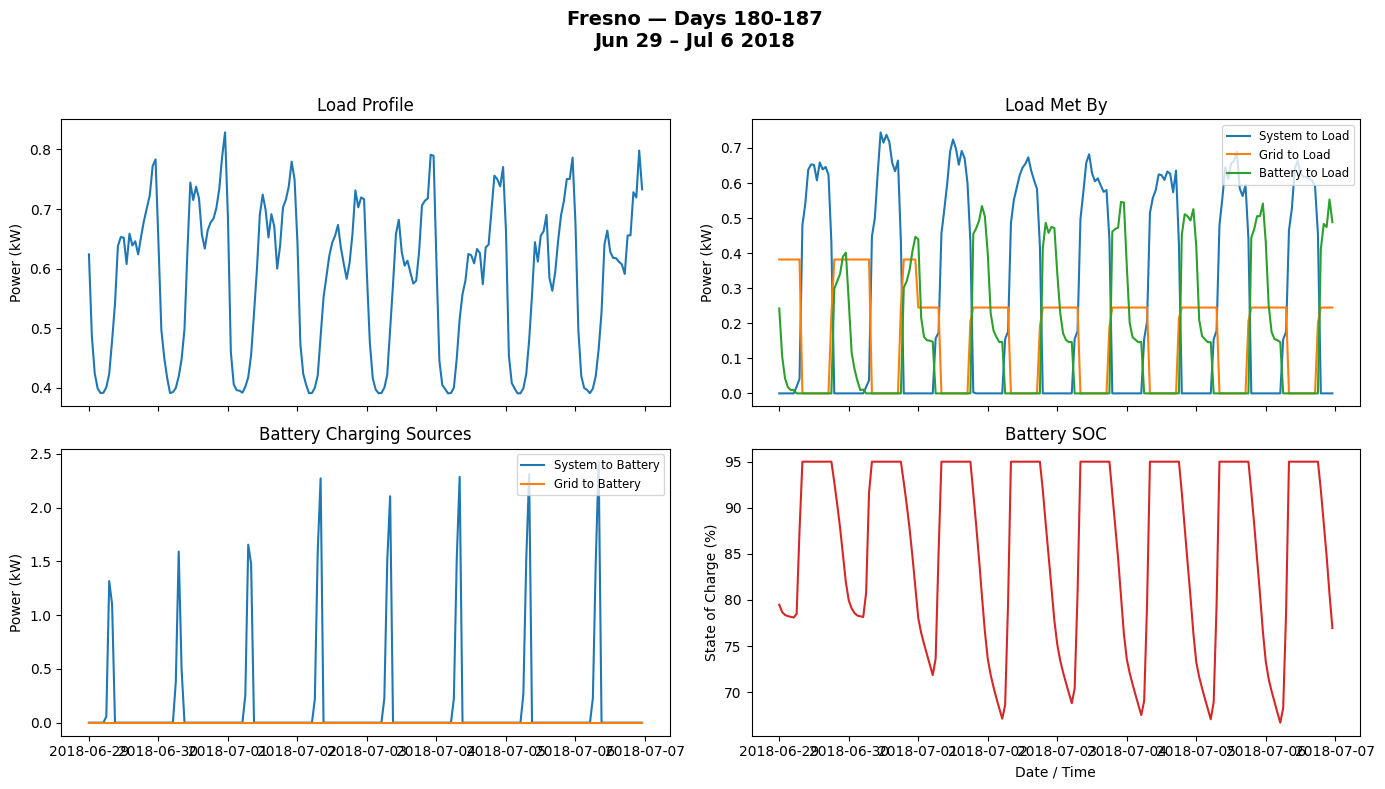

      Merced  •  last modified: 2025-04-30 14:56:34  |  created: 2025-04-30 14:56:34


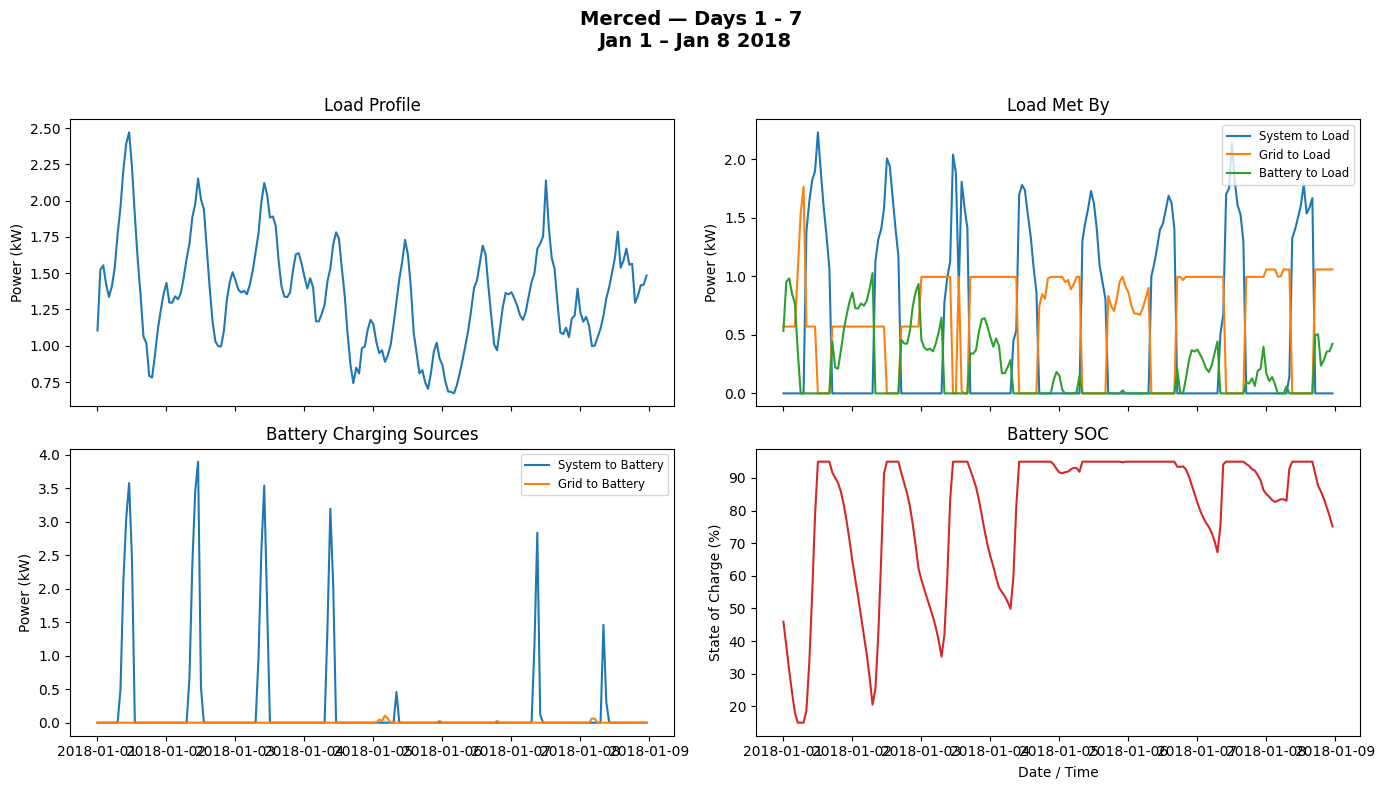

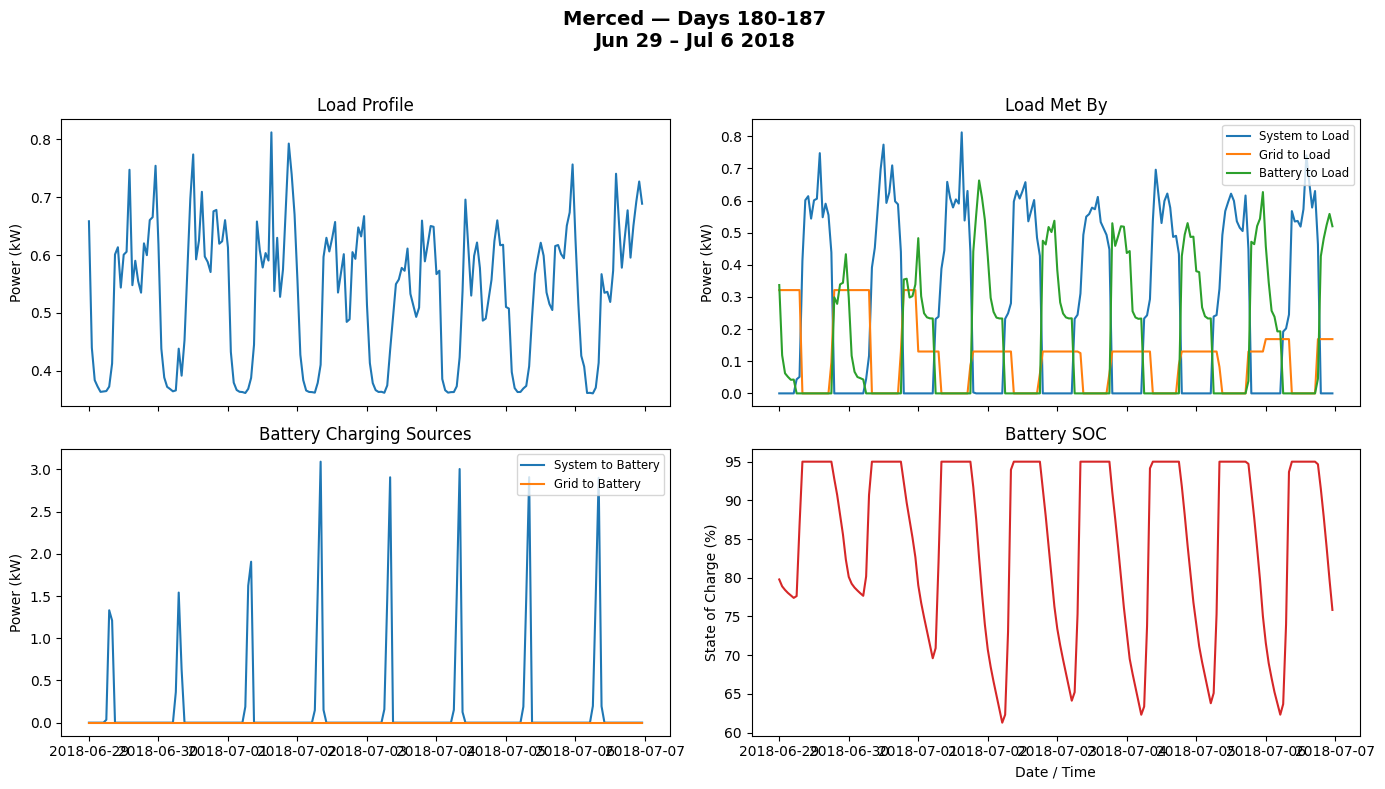

In [15]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as _dt

# ---------------------------  configuration  --------------------------- #
norcal_counties  = ["alameda", "contra_costa", "marin", "napa", "sacramento"]
central_counties = ["fresno", "merced"]
all_counties     = norcal_counties + central_counties

base_dir = "../data/loadprofiles/heat_pump/single-family-detached"

# (label, start, end) triples so you can add more weeks later if you like
weeks = [
    ("Days 1 - 7 \nJan 1 – Jan 8 2018",  "2018-01-01", "2018-01-08 23:00:00"),
    ("Days 180-187\nJun 29 – Jul 6 2018", "2018-06-29", "2018-07-06 23:00:00"),
]

# column groupings for each subplot
LOAD_COL      = ["Load Profile"]                       # subplot A
LOAD_MEET_COL = ["System to Load",
                 "Grid to Load", "Battery to Load"]                       # subplot B
BATT_IN_COL   = ["System to Battery", "Grid to Battery"] # subplot C
SOC_COL       = ["Battery SOC"]                        # subplot D
# ----------------------------------------------------------------------- #

def plot_week(df_slice, county_title, week_title):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
    fig.suptitle(f"{county_title} — {week_title}", fontsize=14, fontweight="bold")

    # --- subplot A: load profile ----------------------------------------
    ax = axes[0, 0]
    ax.plot(df_slice.index, df_slice[LOAD_COL[0]])
    ax.set_title("Load Profile")
    ax.set_ylabel("Power (kW)")

    # --- subplot B: how the load is met ---------------------------------
    ax = axes[0, 1]
    for col in LOAD_MEET_COL:
        ax.plot(df_slice.index, df_slice[col], label=col)
    ax.set_title("Load Met By")
    ax.set_ylabel("Power (kW)")
    ax.legend(loc="upper right", fontsize="small")

    # --- subplot C: what’s feeding the battery --------------------------
    ax = axes[1, 0]
    for col in BATT_IN_COL:
        ax.plot(df_slice.index, df_slice[col], label=col)
    ax.set_title("Battery Charging Sources")
    ax.set_ylabel("Power (kW)")
    ax.legend(loc="upper right", fontsize="small")

    # --- subplot D: battery SOC -----------------------------------------
    ax = axes[1, 1]
    ax.plot(df_slice.index, df_slice[SOC_COL[0]], color="tab:red")
    ax.set_title("Battery SOC")
    ax.set_ylabel("State of Charge (%)")
    ax.set_xlabel("Date / Time")

    # tidy up
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
    plt.show()


for county in all_counties:
    pattern = os.path.join(base_dir, county,
                           f"sam_optimized_load_profiles_{county}.csv")
    files = glob.glob(pattern)
    if not files:
        print(f"No load-profile CSV for “{county}” (looked in {pattern})")
        continue

    file_path = files[0]

    # -------  NEW: show file timestamps  ------------- #
    mod_ts = _dt.fromtimestamp(os.path.getmtime(file_path))
    msg = f"{county.title():>12}  •  last modified: {mod_ts:%Y-%m-%d %H:%M:%S}"
    try:                                  # getctime is creation time on Windows
        create_ts = _dt.fromtimestamp(os.path.getctime(file_path))
        msg += f"  |  created: {create_ts:%Y-%m-%d %H:%M:%S}"
    except (AttributeError, OSError):
        pass
    print(msg)

    df = pd.read_csv(files[0],
                     parse_dates=[0],
                     index_col=0).sort_index()  # ensure chronological order

    # produce one four-panel figure per requested week
    for week_title, start, end in weeks:
        df_week = df.loc[start:end]
        if df_week.empty:          # safety check
            print(f"{county}: no data for {week_title}")
            continue
        plot_week(df_week, county.title(), week_title)